In [1]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm

from scipy.special import softmax
from scipy.spatial.distance import cdist
import numpy as np
import torch

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, ParameterGrid, train_test_split
from sklearn.datasets import make_classification, make_regression

from mlxtend.plotting import plot_decision_regions

In [14]:
X, Y = make_classification(n_samples=150, n_features=2,
                          n_informative=2, n_classes=3,
                          n_redundant=0,
                          n_clusters_per_class=1,
                          random_state=0)

<Axes: >

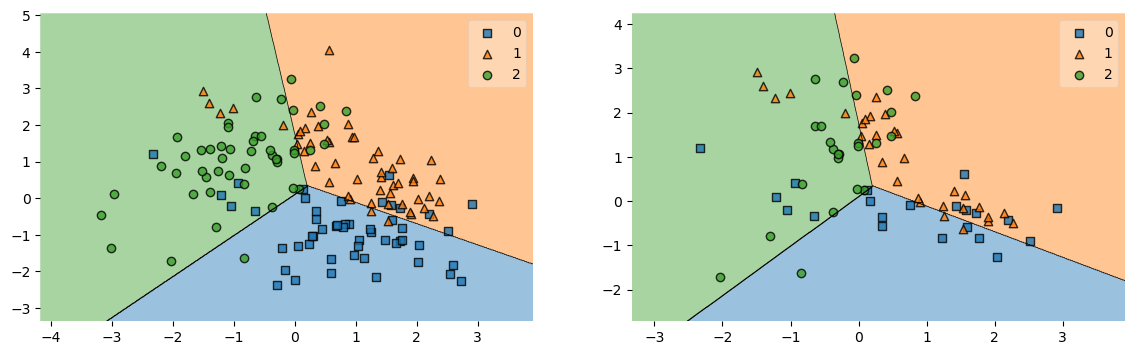

In [3]:
model = SVC(kernel="linear")
_ = model.fit(X,Y)

fig, gs = plt.figure(figsize=(14,4)), gridspec.GridSpec(1,2)

ax = []
for i in range(2):
    ax.append(fig.add_subplot(gs[i]))

plot_decision_regions(X, Y, model, ax=ax[0])
plot_decision_regions(X[model.support_], Y[model.support_], model, ax=ax[1]) 

<Axes: >

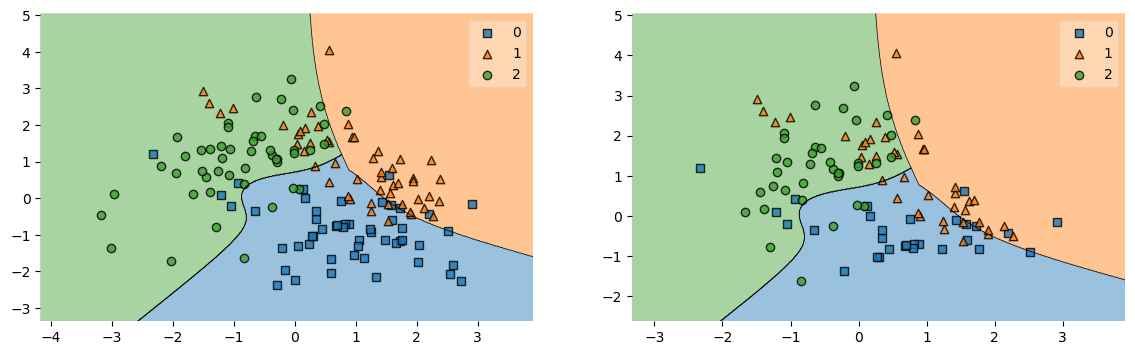

In [4]:
model = SVC(kernel="poly")
_ = model.fit(X,Y)

fig, gs = plt.figure(figsize=(14,4)), gridspec.GridSpec(1,2)

ax = []
for i in range(2):
    ax.append(fig.add_subplot(gs[i]))

plot_decision_regions(X, Y, model, ax=ax[0])
plot_decision_regions(X[model.support_], Y[model.support_], model, ax=ax[1]) 

<Axes: >

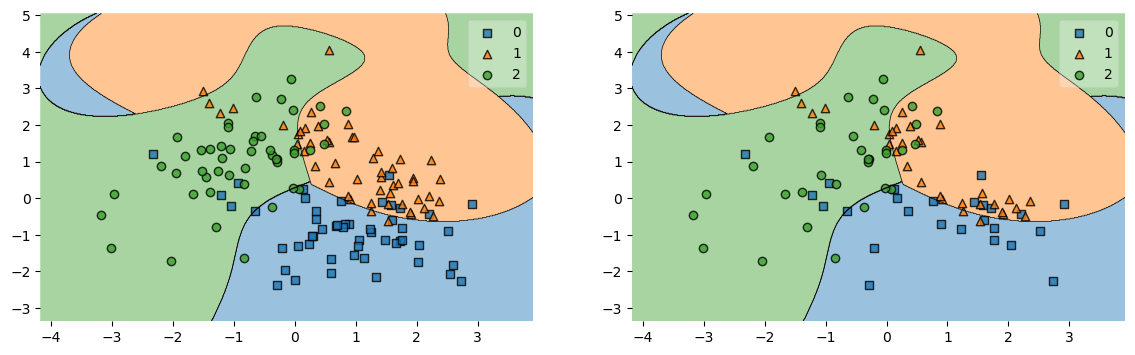

In [5]:
model = SVC(kernel="rbf")
_ = model.fit(X,Y)

fig, gs = plt.figure(figsize=(14,4)), gridspec.GridSpec(1,2)

ax = []
for i in range(2):
    ax.append(fig.add_subplot(gs[i]))

plot_decision_regions(X, Y, model, ax=ax[0])
plot_decision_regions(X[model.support_], Y[model.support_], model, ax=ax[1]) 

In [6]:
def kernel(x1,x2):
    return (x1@x2.T)**2

<Axes: >

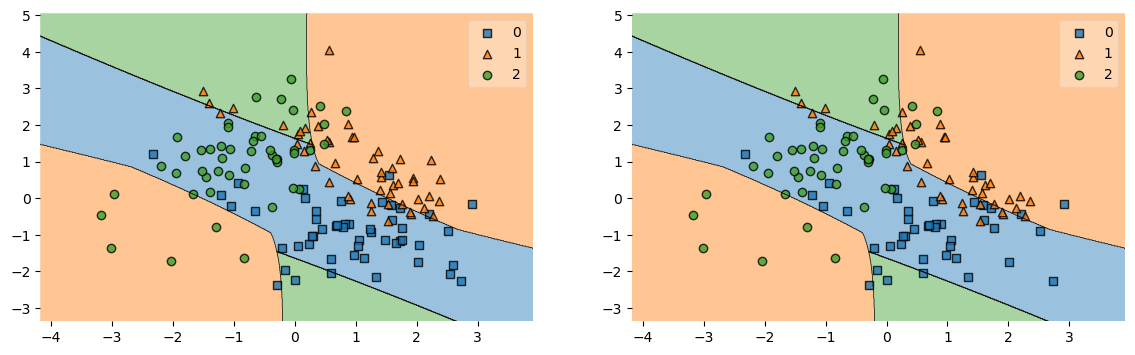

In [7]:
model = SVC(kernel=kernel)
_ = model.fit(X,Y)

fig, gs = plt.figure(figsize=(14,4)), gridspec.GridSpec(1,2)

ax = []
for i in range(2):
    ax.append(fig.add_subplot(gs[i]))

plot_decision_regions(X, Y, model, ax=ax[0])
plot_decision_regions(X[model.support_], Y[model.support_], model, ax=ax[1]) 

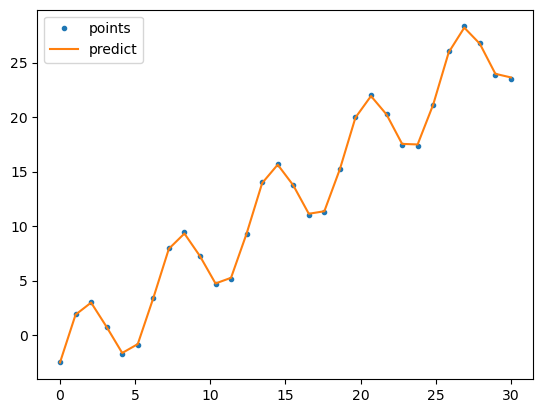

In [8]:
x = np.linspace(0,30,num=30)
Y = x+4*np.sin(x)+2*np.random.randn(1)
X = np.array([x,np.sin(x)]).T
model = SVR(kernel='linear')
_ = model.fit(X,Y)
plt.plot(x,Y,'.',label='points')
plt.plot(x, model.predict(X), label='predict')
plt.legend(loc="best")

In [11]:
def kernel(x,y):
    return (np.cos(x))@(np.cos(y)).T+x@y.T

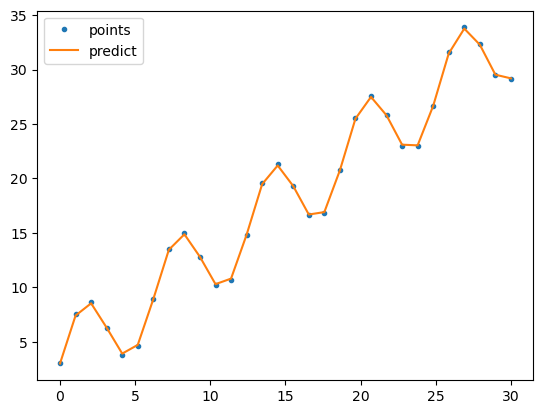

In [12]:
x = np.linspace(0,30,num=30)
Y = x+4*np.sin(x)+2*np.random.randn(1)
X = np.array([x,np.sin(x)]).T
model = SVR(kernel=kernel)
_ = model.fit(X,Y)
plt.plot(x,Y,'.',label='points')
plt.plot(x, model.predict(X), label='predict')
plt.legend(loc="best")

In [15]:
X, Y = make_classification(n_samples=150, n_features=2,
                          n_informative=2, n_classes=3,
                          n_redundant=0,
                          n_clusters_per_class=1,
                          random_state=0)
model = SVC(kernel='rbf')
_ = model.fit(X,Y)
model.score(X,Y)

0.8133333333333334

In [20]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [21]:
model = SVC(kernel='rbf')
_ = model.fit(X,Y)
model.score(X,Y)

0.82